In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.metrics import Precision, Recall

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

In [ ]:
batch_size = 32
image_height = 48
image_width = 48
epoch = 48

In [ ]:
train_path = 'Emotion/train/'
test_path = 'Emotion/test/'

In [4]:
labels = os.listdir("Emotion/train")
labels

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [9]:
def plotting(item_dir, num_imgs=5):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(10, 10, idx+1)
        img = plt.imread(img_path)
        plt.axis('off')
        plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.tight_layout()

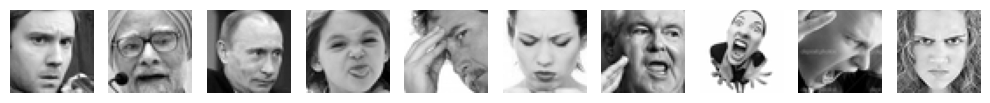

In [10]:
plotting("Emotion/train/angry/", 10)

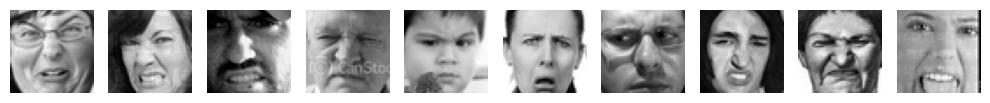

In [11]:
plotting("Emotion/train/disgusted/", 10)

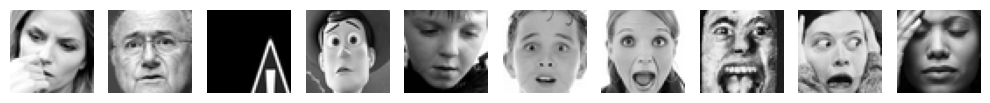

In [12]:
plotting("Emotion/train/fearful/", 10)

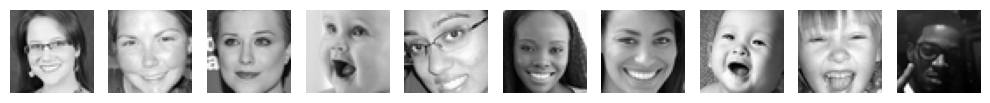

In [13]:
plotting("Emotion/train/happy/", 10)

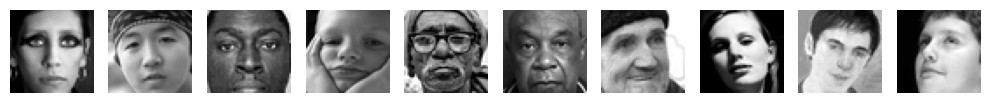

In [14]:
plotting("Emotion/train/neutral/", 10)

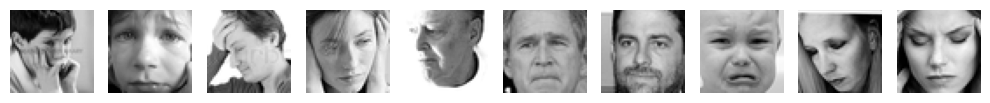

In [15]:
plotting("Emotion/train/sad/", 10)

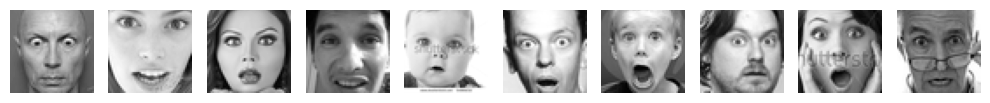

In [16]:
plotting("Emotion/train/surprised/", 10)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(image_height, image_width),
                                                  color_mode='grayscale', 
                                                  class_mode='categorical', 
                                                  batch_size= batch_size,
                                                  )

test_dataset = test_datagen.flow_from_directory(test_path,
                                                  target_size=(image_height, image_width),
                                                  color_mode='grayscale', 
                                                  class_mode='categorical', 
                                                  batch_size= batch_size,
                                                  )

In [ ]:
train_dataset.image_shape

In [ ]:
checkpoint = ModelCheckpoint("Emotion_model-1.h5", mode='auto', save_freq='epoch')

In [ ]:
model = Sequential([
  
    Conv2D(32,(3,3),strides=(1, 1),padding='same',activation='relu',input_shape=train_dataset.image_shape),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64,(3,3),strides=(1, 1),padding='same',activation='relu'),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128,(3,3),strides=(1, 1),padding='same',activation='relu'),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(256,(3,3),strides=(1, 1),padding='same',activation='relu'),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax'),
 
])
model.summary()

In [ ]:
METRICS = [
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall')
    ]

In [ ]:
model.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=METRICS)

In [ ]:
history_model = model.fit(train_dataset, batch_size=batch_size, validation_data=test_dataset, epochs=epoch, callbacks=[checkpoint])

In [ ]:
model.save('Emotion_model-1.h5')

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(40, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy','precision','recall', 'loss']):
    ax[i].plot(history_model.history[met])
    ax[i].plot(history_model.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
predictions = model.predict(test_dataset)

In [ ]:
def evaluate(actual, predictions):
  pre = []
  for i in predictions:
    pre.append(np.argmax(i))

  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')

  fig, ax = plt.subplots(figsize=(5,5))
  conf_mat = confusion_matrix(actual, pre)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', xticklabels=labels, yticklabels=labels).set_title('Confusion Matrix Heat map')
  plt.show()

In [ ]:
evaluate(test_dataset.classes,predictions)

In [ ]:
model.evaluate(test_dataset)